![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 6.6
## Feature Encoding

### Data

**Predict the chronic kidney disease.**

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.

We use the following representation to collect the dataset 
- age	-	age	
- bp	-	blood pressure 
- sg	-	specific gravity 
- al	- albumin 
- su	-	sugar 
- rbc	-	red blood cells 
- pc	-	pus cell 
- pcc	-	pus cell clumps 
- ba	-	bacteria 
- bgr	-	blood glucose random 
- bu	-	blood urea 
- sc	-	serum creatinine 
- sod	-	sodium 
- pot	-	potassium 
- hemo	-	hemoglobin 
- pcv	-	packed cell volume 
- wc	-	white blood cell count 
- rc	-	red blood cell count 
- htn	-	hypertension 
- dm	-	diabetes mellitus 
- cad	-	coronary artery disease 
- appet	-	appetite 
- pe	-	pedal edema 
- ane	-	anemia 
- class	-	class




[Chronic Kidney Disease DataSet](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

In [1]:
# IMPORT LABRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### 1. Load Data

In [2]:
# Read Data
kidney = '../DATA/kidney_disease.csv'
data = pd.read_csv(kidney,index_col='id')
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### 2. Perform EDA

Perform EDA. Check null values. Impute if necessary.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe                399 non-null object
ane       

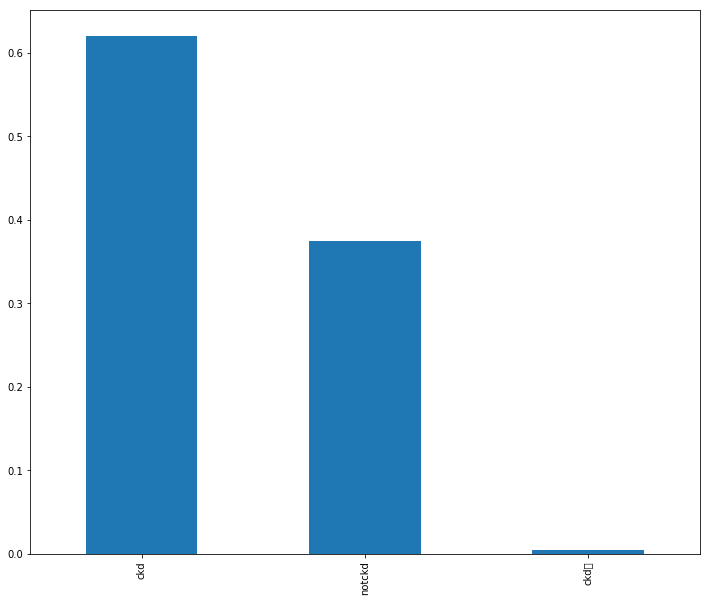

In [4]:
data['classification'].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))

#### Impute Null Values

Impute null values for numeric and object columns.

In [5]:
from ipywidgets import widgets, interactive

def Plot_categorical(col):
    data[col].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))

    
# Make a dropdown to select the Area, or "All"
symbol = widgets.Dropdown(
    options=list(data.select_dtypes(exclude='number').columns),
    value='classification',
    description='Categorial Features:',
)

def plotcat(symbol):
    df2 = data[symbol]
    if len(df2) > 0:
        Plot_categorical(symbol)

interactive(plotcat,symbol=symbol)


interactive(children=(Dropdown(description='Categorial Features:', index=13, options=('rbc', 'pc', 'pcc', 'ba'…

In [6]:

data['classification'] = data['classification'].apply(lambda x: 'ckd' if x == 'ckd\t' else x)


data['pcv'] = data['pcv'].apply(lambda x: '43' if x == '\t43' else x)
data['pcv'] = data['pcv'].apply(lambda x: '' if x == '\t?' else x)
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')

# Clean dm
data['dm'] = data['dm'].apply(lambda x: 'no' if x == '\tno' else x)
data['dm'] = data['dm'].apply(lambda x: 'yes' if x == '\tyes' else x)
data['dm'] = data['dm'].str.strip()

data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')

data['cad'] = data['cad'].apply(lambda x: 'no' if x == '\tno' else x)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               329 non-null float64
wc                294 non-null float64
rc                269 non-null float64
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe                399 non-null object
ane    

In [8]:
# Numerical variable
for col in data.select_dtypes(include='number').columns:
    if data[col].isnull().sum() > 0:
        data[col][data[col].isnull() == True] = data[col].mean()

# Categorical variable
for col in data.select_dtypes(exclude='number').columns:
    if data[col].isnull().sum() > 0:
        data[col][data[col].isnull() == True] = data[col].mode()[0]

        
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [9]:
symbol = widgets.Dropdown(
    options=list(data.select_dtypes(exclude='number').columns),
    value='classification',
    description='Categorial Features:',
)

interactive(plotcat,symbol=symbol)

interactive(children=(Dropdown(description='Categorial Features:', index=10, options=('rbc', 'pc', 'pcc', 'ba'…

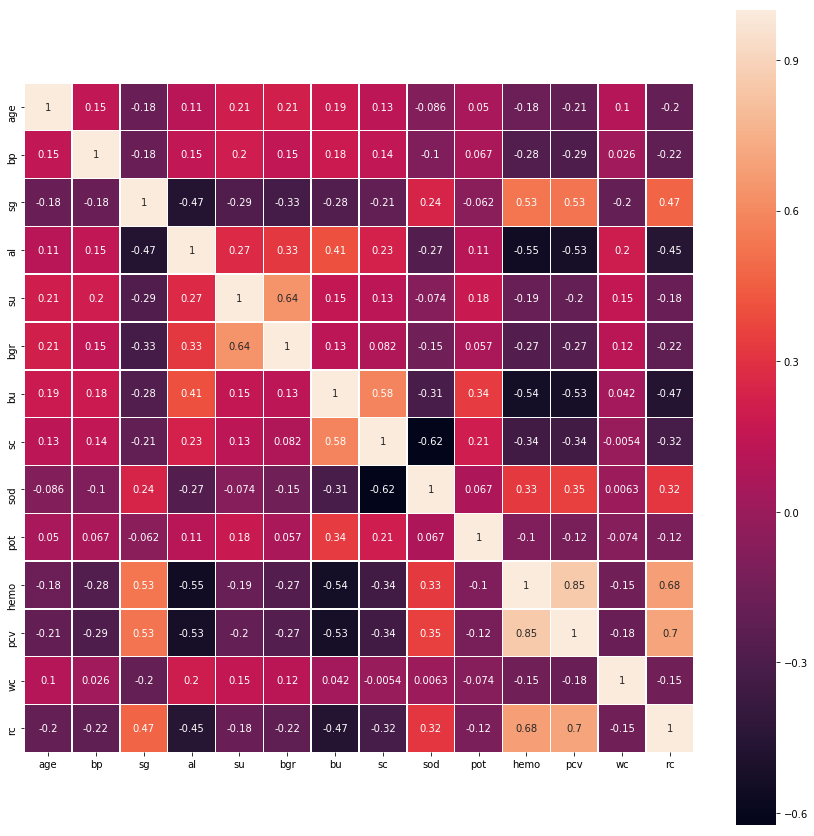

In [10]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), square=True, linewidths=.5, annot=True);


#### 3. Label Encoder

Encode labels with value between 0 and n_classes-1.

> from sklearn.preprocessing import LabelEncoder

In [11]:
# ANSWER
from sklearn.preprocessing import LabelEncoder

categorical_features = data.select_dtypes(exclude='number').columns
le = LabelEncoder()

label_data = data[categorical_features].apply(lambda col: le.fit_transform(col))

label_data.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0


#### 4. OneHotEncoder 

Encode categorical integer features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array.

By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually. The OneHotEncoder previously assumed that the input features take on values in the range [0, max(values)). This behaviour is deprecated.

This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

> from sklearn.preprocessing import OneHotEncoder

In [12]:
# ANSWER
from sklearn.preprocessing import OneHotEncoder

#categorical_features = data.select_dtypes(exclude='number').columns

ohe = OneHotEncoder(categories='auto') 
#ohe.fit(data[numerical_features])


In [13]:
#data[numerical_features] = ohe.transform(data[numerical_features])
data_ohe = ohe.fit_transform(data[categorical_features]).toarray()
data_ohe


array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

#### 5. Dummy Variables

Convert categorical variable into dummy/indicator variables

In [14]:
# ANSWER
dummy = pd.get_dummies(data[categorical_features])
dummy.head()


,rbc_abnormal,rbc_normal,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,...,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_notckd
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,0,1,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,0,1,0,1,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,1,0
3,0,1,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0
4,0,1,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


####  6. Set Target 

Set `classification` as target.

In [15]:
target = 'classification'
features = list(set(list(data.columns)) - set([target]))

In [16]:
# use one of teh categorical encoded feature set 
data[categorical_features] = label_data
X = data[features]
y = data[target]

In [17]:
X.head()

,al,rc,hemo,htn,bgr,sc,pcc,bu,age,pot,...,appet,cad,rbc,ba,wc,su,pcv,pc,ane,bp
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.200000,15.4,1,121.000000,1.2,0,36.0,48.0,4.627244,...,0,0,1,0,7800.0,0.0,44.0,1,0,80.0
1,4.0,4.707435,11.3,0,148.036517,0.8,0,18.0,7.0,4.627244,...,0,0,1,0,6000.0,0.0,38.0,1,0,50.0
2,2.0,4.707435,9.6,0,423.000000,1.8,0,53.0,62.0,4.627244,...,1,0,1,0,7500.0,3.0,31.0,1,1,80.0
3,4.0,3.900000,11.2,1,117.000000,3.8,1,56.0,48.0,2.500000,...,1,0,1,0,6700.0,0.0,32.0,0,1,70.0
4,2.0,4.600000,11.6,0,106.000000,1.4,0,26.0,51.0,4.627244,...,0,0,1,0,7300.0,0.0,35.0,1,0,80.0


#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y 
- Find top 4 features
- Transform features to a DataFrame

In [18]:
# ANSWER
from sklearn.feature_selection import SelectKBest, chi2


kbest = SelectKBest(chi2, k=4)
kbest.fit(X, y)
X_new = kbest.transform(X)


In [19]:
def get_kbest_features(kbest_classifier, feature_names):
    mask = kbest_classifier.get_support() #list of booleans
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
            
    return new_features
        
k_features = get_kbest_features(kbest,list(X.columns.values))

In [20]:
# Transform features to a dataframe
Xk_new = pd.DataFrame(X_new, columns=k_features)
Xk_new.head()


,bgr,sc,bu,wc
0,121.000000,1.2,36.0,7800.0
1,148.036517,0.8,18.0,6000.0
2,423.000000,1.8,53.0,7500.0
3,117.000000,3.8,56.0,6700.0
4,106.000000,1.4,26.0,7300.0


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [21]:
# ANSWER
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

linear = LogisticRegression()
rfe = RFE(estimator=linear, n_features_to_select=4, step=1)
rfe.fit(X, y)
rfe.ranking_





array([ 1, 10,  6,  1, 15,  4, 16, 18, 19,  5,  1, 13,  2,  3,  1, 17, 12,
       20, 21,  7, 11,  9,  8, 14])

In [22]:
rfe.score(X,y)

0.9375

In [23]:
X.columns.values[rfe.get_support()]

array(['al', 'htn', 'dm', 'appet'], dtype=object)

#### Create multiple Classifier Model

Create multiple classifier models to predict the chronic kidney disease. Use any models of your choice. Evaluate all models and select the best model according to their performance. 

In [24]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.cluster import KMeans

def run_model(model, X, y,cv=10):    
    return cross_val_score(model, X, y, cv=cv).mean()


models = []

models.append(("DecisionTree",DecisionTreeClassifier(random_state=0)))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("Kmeans",KMeans(n_clusters=2)))
models.append(("LinearSVC",LinearSVC()))
models.append(("NuSVC",NuSVC()))
models.append(("SVC",SVC()))


results = []
names = []

best_model = {'model': '', 'score': 0}

best = 0
for name, model in models:
    result = run_model(model, data[features], data[target])
    print (name, result)
    
    if (result > best_model['score']):
        best_model['model'] = model
        best_model['score'] = result
        
        
print (best_model)

NameError: name 'DecisionTreeClassifier' is not defined